In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,tensor_yn,sql_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,0,0,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,10,1,0,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,0,0,0,1,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

    

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead'  in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [6]:
## Job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df['job_simp'].value_counts()
#df[df['job_simp'] == 'na']['Job Title'].head(40)

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
#fix state los angeles
df['job_state'] = df['job_state'].apply(lambda x: ' CA' if x.lower() == ' los angeles' else x)
df['job_state'].value_counts()


 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 IN     10
 UT     10
 MO      9
 AZ      9
 AL      8
 MI      6
 GA      6
 DE      6
 KY      6
 IA      5
 CT      5
 OR      4
 LA      4
 NE      4
 KS      3
 NM      3
 MN      2
 ID      2
 RI      1
 SC      1
Name: job_state, dtype: int64

In [11]:
# Job description lenght

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
df['desc_len'].describe()

count      742.000000
mean      3910.172507
std       1533.827777
min        407.000000
25%       2834.000000
50%       3781.500000
75%       4772.000000
max      10146.000000
Name: desc_len, dtype: float64

In [13]:
df['num_comp'] = df ['Competitors'].apply(lambda x: 0 if x == "-1" else len(x.split(',')))

In [14]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [15]:
#Hourly wage to anual
df['min_salary'] = df.apply(lambda x: x.min_salary if x.hourly != 1 else x.min_salary * 2, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary if x.hourly != 1 else x.max_salary * 2, axis=1)

In [16]:
df['avg_salary'] = df.apply(lambda x: x.avg_salary if x.hourly != 1 else x.avg_salary * 2, axis=1)

In [17]:
df[df['hourly'] == 1][['hourly','min_salary','max_salary', 'avg_salary']]

,hourly,min_salary,max_salary,avg_salary
165,1,34,48,41.0
177,1,42,68,55.0
197,1,36,50,43.0
202,1,42,68,55.0
210,1,30,50,40.0
246,1,34,48,41.0
271,1,42,68,55.0
337,1,36,50,43.0
345,1,48,78,63.0
357,1,42,68,55.0


In [18]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\r', ''))
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [19]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,tensor_yn,sql_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,0.097035,0.512129,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,0.296205,0.500190,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

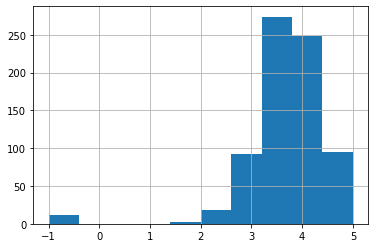

In [22]:
df.Rating.hist()

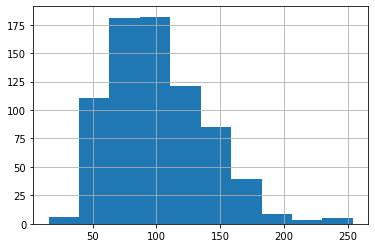

In [23]:
df.avg_salary.hist()

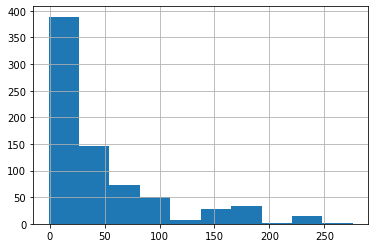

In [24]:
df.age.hist()

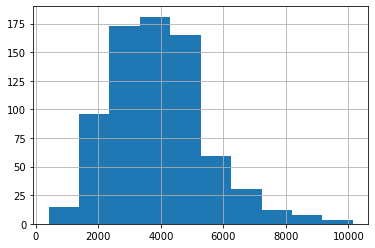

In [25]:
df.desc_len.hist()

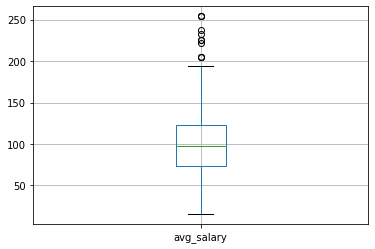

In [26]:
df.boxplot(['avg_salary'])

In [27]:
corr = df[['age', 'avg_salary', 'desc_len', 'Rating', 'num_comp']].corr()
corr

,age,avg_salary,desc_len,Rating,num_comp
age,1.000000,0.021996,0.165090,0.021655,0.126687
avg_salary,0.021996,1.000000,0.069742,0.012517,0.083263
desc_len,0.165090,0.069742,1.000000,-0.012631,0.104846
Rating,0.021655,0.012517,-0.012631,1.000000,0.027190
num_comp,0.126687,0.083263,0.104846,0.027190,1.000000


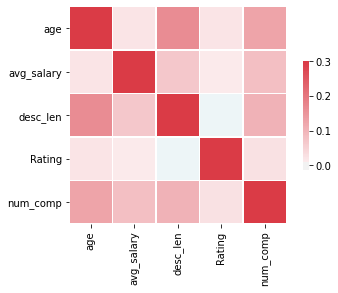

In [28]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, vmax=.3, cmap=cmap, square=True, linewidths=.5, center= 0,
            cbar_kws={'shrink':.5})

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','job_state', 'same_state', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn', 'job_simp',
       'seniority']]

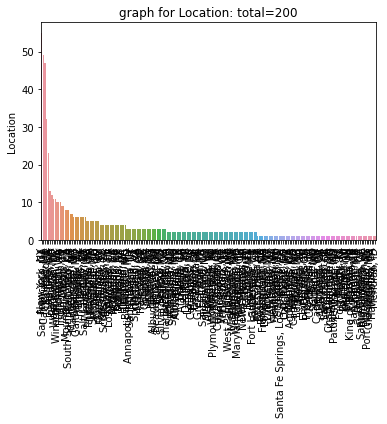

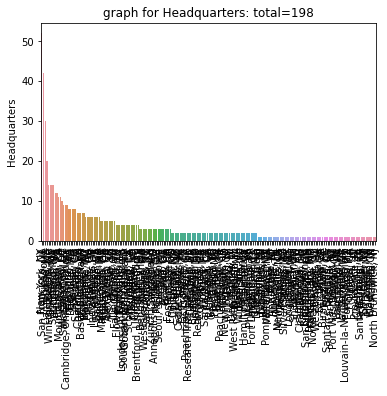

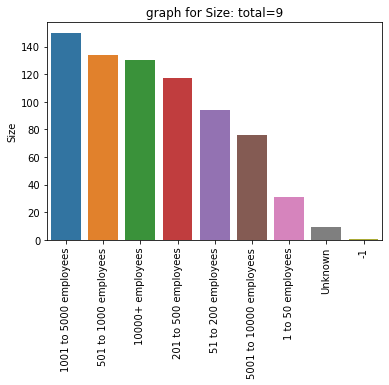

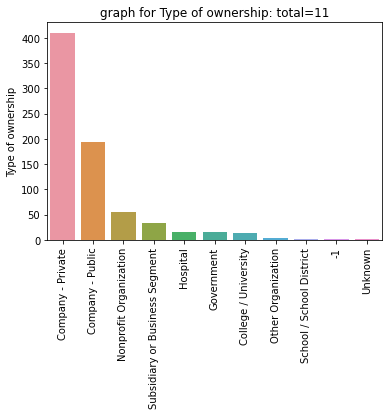

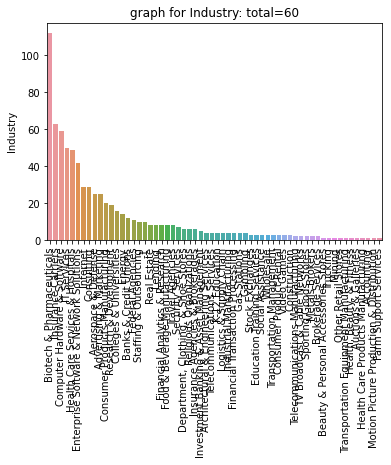

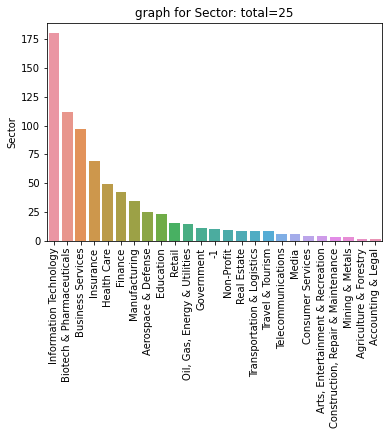

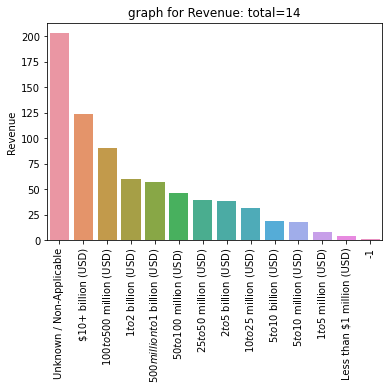

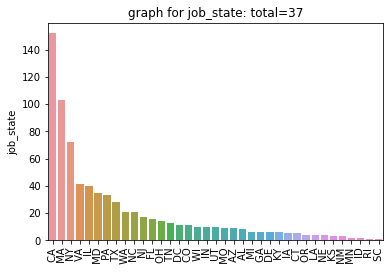

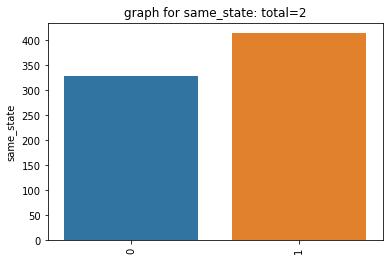

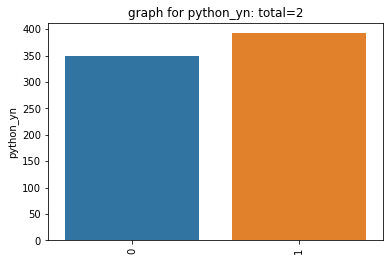

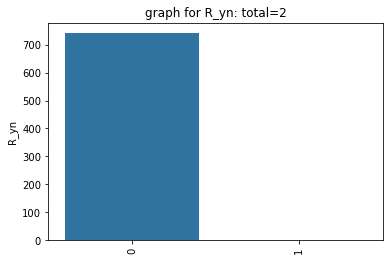

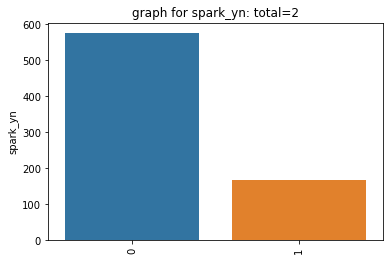

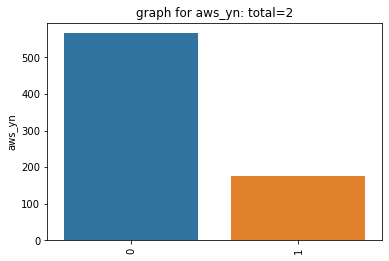

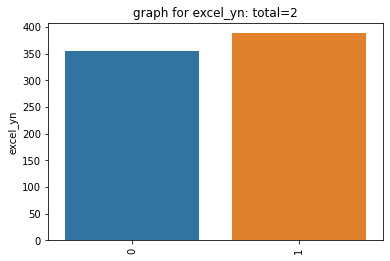

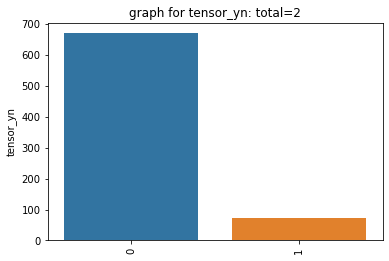

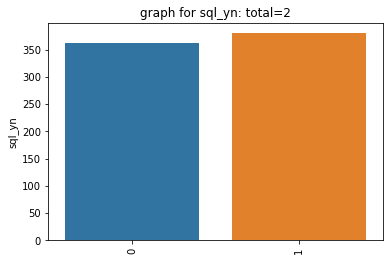

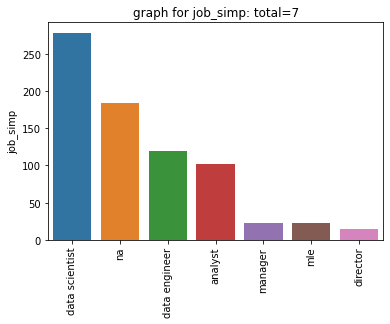

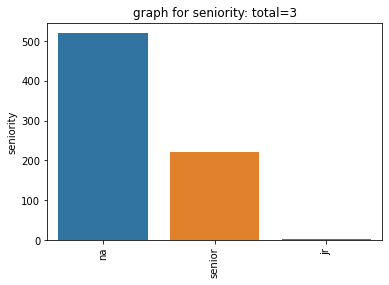

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    
    chart = sns.barplot(x=cat_num.index, y= cat_num)
    plt.title(f'graph for {i}: total={len(cat_num)}')
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

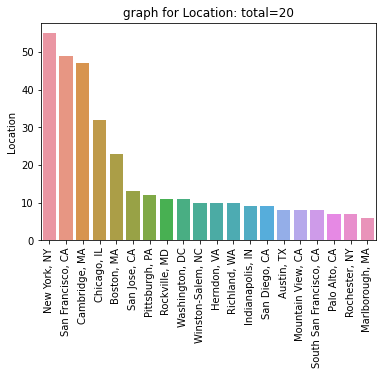

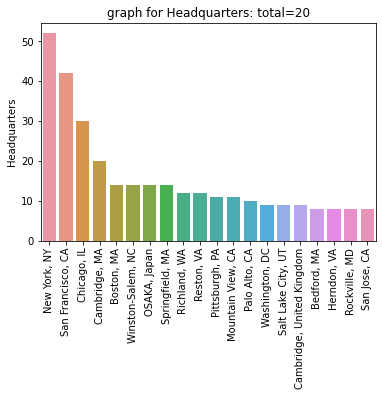

In [32]:
for i in df_cat[['Location', 'Headquarters']].columns:
    cat_num = df_cat[i].value_counts()[:20] #show only the 20 first's   
    chart = sns.barplot(x=cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.title(f'graph for {i}: total={len(cat_num)}')
    plt.show()

In [33]:
pd.pivot_table(df, index='job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,66.122549
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,87.967391


In [34]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      80.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          78.500000
               senior     109.061404

In [38]:
pd.set_option('display.max_rows', 115)
pd.pivot_table(df, index=['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
 WI       na                       4
          data scientist           3
          analyst                  3
 WA       na                       1
          data scientist          17
          analyst                  3
 VA       na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
 UT       data engineer            3
          analyst                  4
          data scientist           3
 TX       na                       7
          data scientist          13
          data engineer            8
 TN       data scientist           1
          data engineer           10
          analyst                  2
 SC       na                       1
 RI       analyst                  1
 PA       manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
 OR       data scientist           3
          data engineer            1
 OH       na                       3
          data scientist           7
          analyst                  4
 NY       na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
 NM       data scientist           3
 NJ       data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
 NE       na                       4
 NC       na                      12
          data scientist           3
          data engineer            6
 MO       na                       3
          manager                  1
          data scientist           3
          analyst                  2
 MN       data engineer            1
          analyst                  1
 MI       manager                  2
          data scientist           4
 MD       na                      16
          data scientist          13
          data engineer            3
          analyst                  3
 MA       na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
 LA       analyst                  1
          data engineer            2
          na                       1
 KY       na                       4
          data scientist           2
 KS       mle                      3
 IN       na                       4
          data scientist           2
          data engineer            4
 IL       analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
 ID       analyst                  2
 IA       analyst                  2
          data engineer            3
 GA       data scientist           3
          na                       3
 FL       data scientist           7
          data engineer            3
          analyst                  6
 DE       na                       6
 DC       data scientist           5
          data engineer            4
          analyst                  2
 CT       na                       3
          data scientist           2
 CO       mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
 CA       na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [43]:
# salary by rating, industry, sector, revenue, number of comp, hourly, employrt provided, python, r, spark, aws, excel, tensor, desc_len, typer of onwership

In [44]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'tensor_yn', 'sql_yn', 'Type of ownership']]

In [50]:
for column in df_pivots.columns:
    print(column)
    print(pd.pivot_table(df, index=column, values = 'avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [51]:
pd.pivot_table(df, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc= 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [72]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\airbox\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

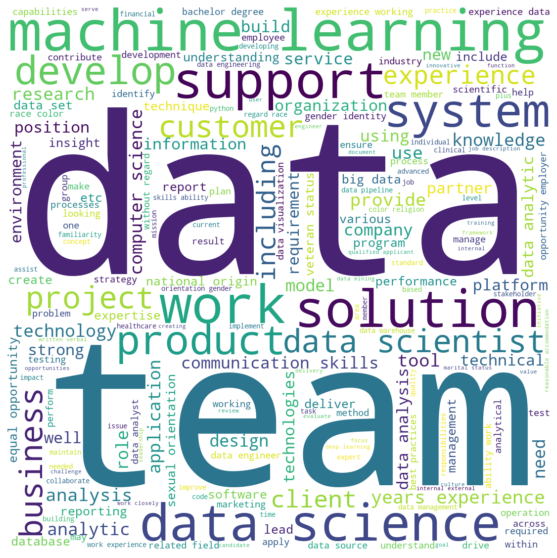

In [74]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    
    return filtered
    

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

WC= WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words = 200, width= 1100, height=1100)
WC.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(WC, interpolation = 'bilinear')
plt.axis('off')
plt.show()